# ITS summer research project
Write a short summary and description of project here. What is the purpose, what are the dependencies and what needs to be installed

### Optional - dependencies and innstallations
In case there is a need to install libraries or add dependencies add them here.

In [1]:
# TODO: add dependencies or libraries

# Suppress notebook warnings
import warnings
import pandas as pd

# Suppress specific warning from openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

pd.set_option('display.max_columns', None)  # Adjust to display all columns
pd.set_option('display.width', 1000)  # Adjust the width to fit your screen

In [2]:
from data_processing import read_nettskjema_file, get_geo
import matplotlib.pyplot as plt
from data_visualization import word_cloud, bag_of_words, geo_plot, box_plot, barh_chart, donut_plot, survey, add_title

## Dataset
Give a description of: 
 - Where the dataset is gathered from
 - What the  dataset contains and its format
 - Describe the type of preprocessing done to the dataset
 - Describe the valuetypes and considerations on modelling

In [3]:
# TODO: add code to get the dataset
data = read_nettskjema_file(["res-engelsk.xlsx","res-norsk.xlsx"])

### Optional - visualize the whole dataset
Give an overview of the whole dataset and describe in more detail the layout if needed.

## Questions
Give an overview of the questionnaire and the full text for each question including its answer-type. Consider relating this to the dataset to show the format at which these values are stored in the dataset.

#### Q1: What are the three most important things to consider when installing renewable energy?
This is an open ended question with free text input. The students where asked to rank the priorities from 1. to 3. through text. The values are considered unstructured text-data and need to be cleaned before visualizing. 

As a simple visualization we have drawn a word-cloud showing the most frequent words by the respondents. 

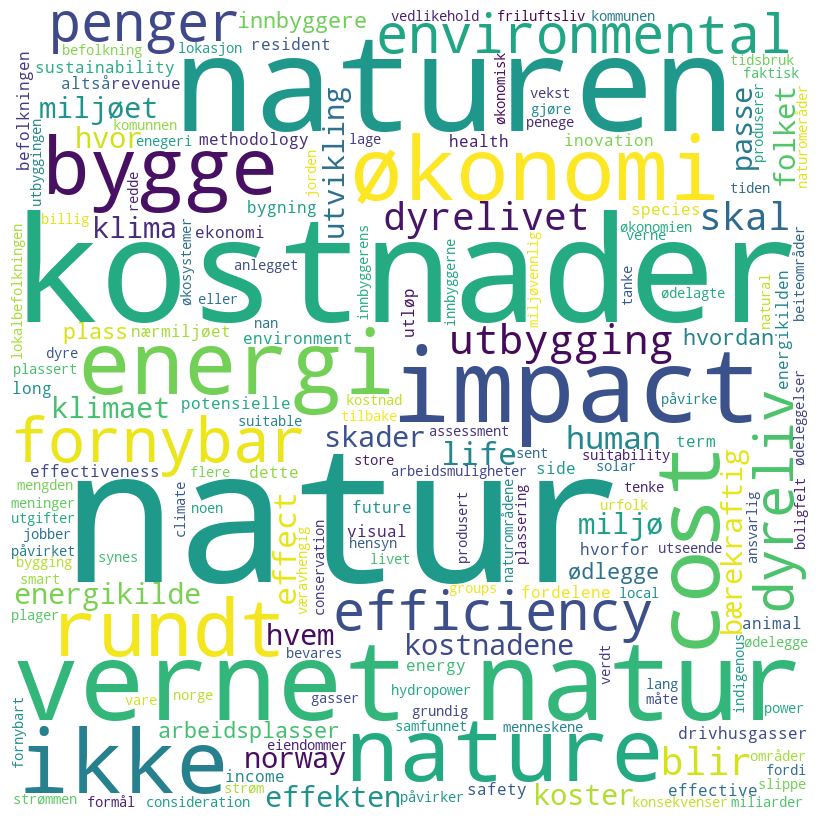

In [4]:
word_cloud(data["opinions"].dropna(axis=0), "sub")

#### Q2: Which renewable energy source would you choose?
This question contains two discrimative choices in a series of five questions. Only at most three questions are shown to the student, depending on their choice of answer. The selection of questions shown to the student depends on: 
1. The first question selects between onshore and offshore wind-production. This dictates the prefered wind-placement for the student. 
2. If onshore is chosen the student has to select between small and large scale windturbines. This dictates the size of the windmills. 
3. The final question gives the student the option to include solar as well as windproduction.

All values are stored as binary. They form a discrete distribution showing the relation between offshore, onshore and a combination with solar. 

49


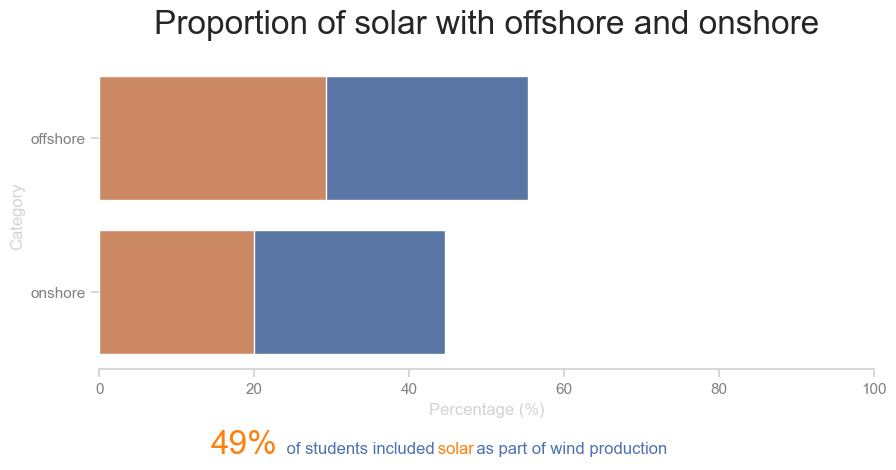

In [200]:
df_sum = data["energySource"]
df_sum = df_sum[["offshore", "onshore", "solar"]]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_sum' is your DataFrame
# Calculate the sum for each category
category_sums = df_sum.sum()

# Calculate percentages
total_respondents = len(df_sum)
percentages = (category_sums / total_respondents) * 100

# Prepare data for plotting
data_for_plot = percentages.reset_index()
data_for_plot.columns = ['Category', 'Percentage']
solar_percentage = int(data_for_plot.iloc[2].values[1])
print(solar_percentage)
data_for_plot = data_for_plot.iloc[:2]

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Category', data=data_for_plot, orient='h')

df_offshore = (df_sum[df_sum["offshore"] == 1]["solar"].sum() / total_respondents) *100
df_onshore = (df_sum[df_sum["onshore"] == 1]["solar"].sum() / total_respondents) * 100
offshore_df = pd.DataFrame({'Percentage': [df_offshore], 'Category': 'offshore'})

onshore_df = pd.DataFrame({'Percentage': [df_onshore], 'Category': 'onshore'})

combined_df = pd.concat([offshore_df, onshore_df], ignore_index=True)

sns.barplot(x='Percentage', y='Category', data=combined_df, orient='h')
plt.title('Proportion of solar with offshore and onshore', ha='center', fontsize=24, pad = 20)
plt.xlabel('Percentage (%)')
plt.ylabel('Category')
plt.xlim(0, 100)

# Emphasize "50%" more by making it larger than the rest of the text
plt.figtext(0.27, -0.1, str(solar_percentage) + "%", ha='center', fontsize=24, color='#FF7F0E')
plt.figtext(0.5, -0.1, ' of students included         as part of wind production', ha='center', fontsize=12, color='#4c72b0')
plt.figtext(0.5, -0.1, '                   solar                           ', ha='center', fontsize=12, color='#FF7F0E')


plt.show()

#### Q3: Which Norwegian county do you think are most appropriate for wind turbines?
This question lets the student choose the municipalities that they feel are appropriate for wind turbines. They can choose multiple places and each municipality can either be choosen or left unchecked. 

In the dataset the values are stored as binary. They create a discrete distribution over each municipality. 

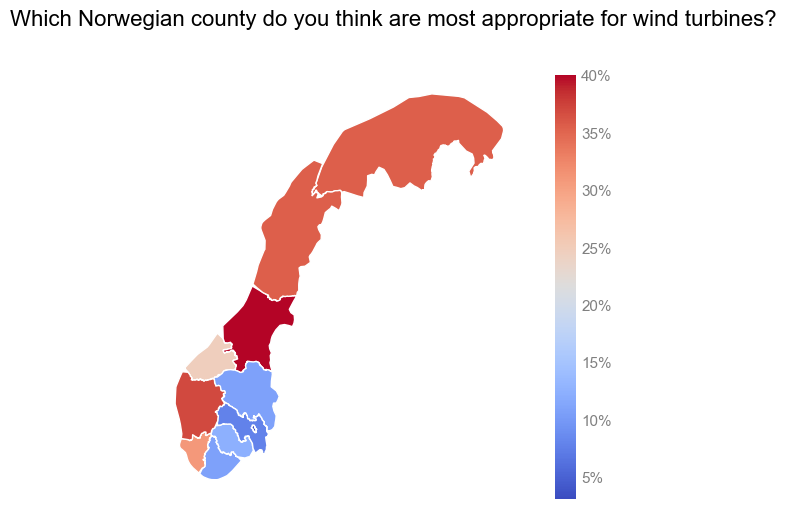

In [6]:
com = get_geo(data["windMun"])
fig, ax = plt.subplots(1,1, figsize = (8,6))
geo_plot(com, fig, ax)
add_title(fig, "Which Norwegian county do you think are most appropriate for wind turbines?")

#### Q4: To what extent you agree or disagree to install wind turbines here?
This question lets the student rank a picture from a scale of 1 to 9. In total there are 9 different locations that are visualized. 

In the dataset the values are stored as discrete integers ranging from 1 to 9 for each question. 

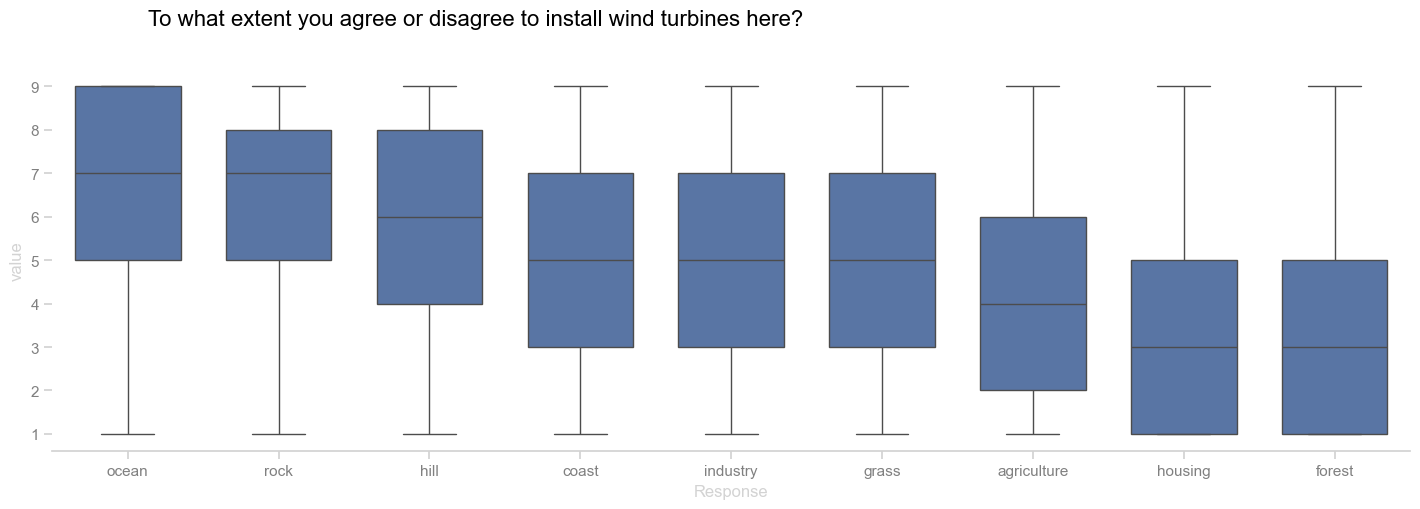

In [7]:
ax = box_plot(data["windVisual"])
add_title(ax.figure,"To what extent you agree or disagree to install wind turbines here?")

#### Q5: To what extent do you agree or disagree with placing wind turbines in the following areas?
This questions is ranked from 1 to 5. In total there are seven questions that define different considerations to take when placing or building renewable energy. 

In the dataset the values are stored as discrete integeres ranging from 1 to 5 for each question. 

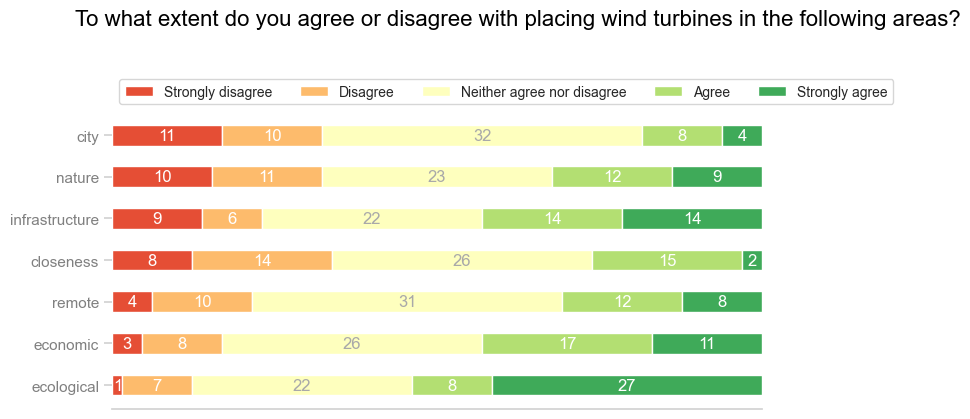

In [8]:
fig, ax = survey(data["windConsideration"])
add_title(fig, "To what extent do you agree or disagree with placing wind turbines in the following areas?")


#### Q6: Which Norwegian county do you think are most appropriate for solar energy?
This question lets the student choose the municipalities that they feel are appropriate for solar turbines. They can choose multiple places and each municipality can either be choosen or left unchecked. 

In the dataset the values are stored as binary. They create a discrete distribution over each municipality. 

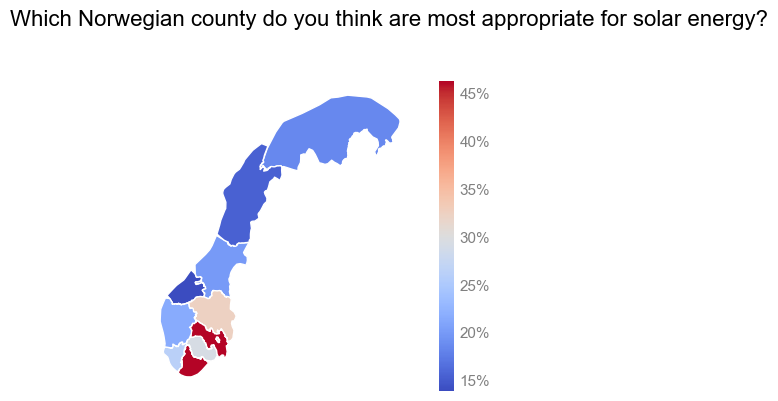

In [9]:
com = get_geo(data["sunPower"])
fig, ax = plt.subplots()
geo_plot(com, fig, ax)
add_title(fig, "Which Norwegian county do you think are most appropriate for solar energy?")

#### Q7: What do you find the most important to think about when producing electricity?
This question is a multiple choice question with four different considerations to take for renewable energy production. 

In the dataset each answerfield is a separate column with a binary choice.

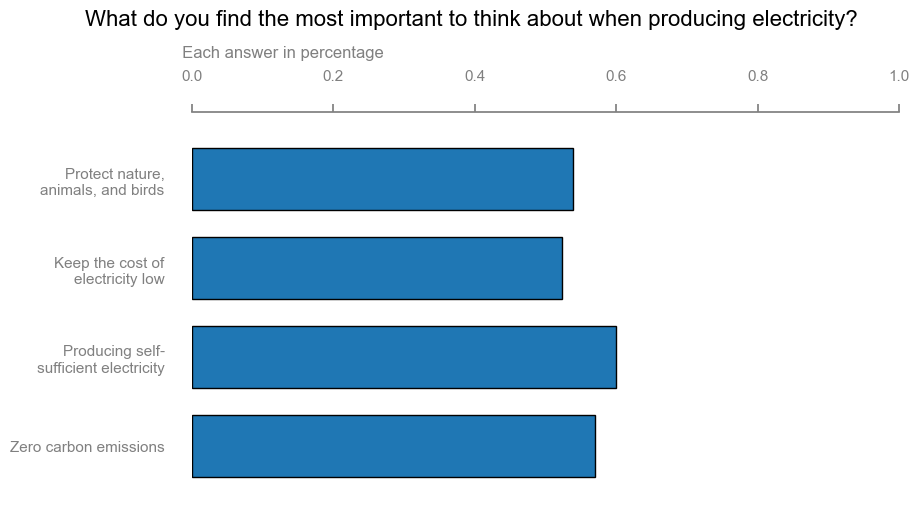

In [10]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_xlim(0, 1)
df = data["electricProd"].aggregate(lambda x: (x.sum() / data["electricProd"].shape[0])).to_frame().reset_index()
rename_dict = {"pollution" : "Zero carbon emissions", "ecological" : "Protect nature, animals, and birds", "cost" : "Keep the cost of electricity low", "capacity" : "Producing self-sufficient electricity"}
df["Response"].replace(rename_dict, inplace=True)
df.set_index("Response", inplace=True)
barh_chart(df, fig, ax)
add_title(fig, "What do you find the most important to think about when producing electricity?", "                     Each answer in percentage")

#### Q8: What do you think is the best way to deal with this [renewable energy] variation?
This question asks the student to find a good solution to deal with variability in renewable energy solution. It gives the student for choices where only one can be chosen. 

In the dataset this is stored as labelled values forming a discrete set. 

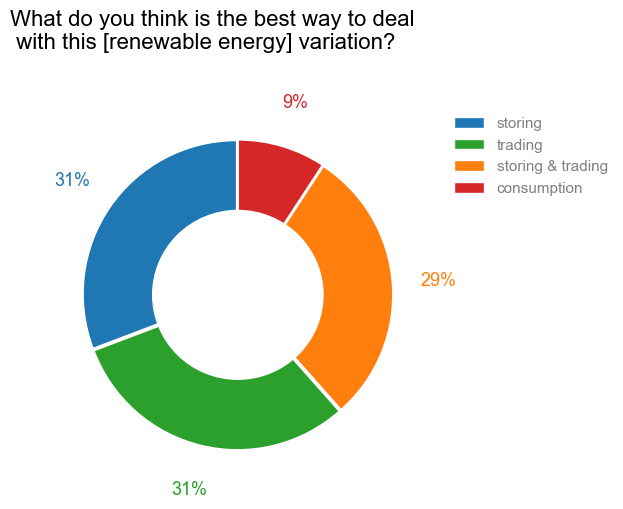

In [11]:
# TODO: Add code to visualize the question
fig, ax = plt.subplots(figsize = (8,6))
df = data["renewableVariance"].groupby('sub')['sub'].count().sort_values(ascending = False)
rename_dict = {"storing" : "storing", "trading" : "trading", "exporting" : "storing & trading", "conusmption" : "demand response"}
df.rename(index = rename_dict, inplace = True)
donut_plot(df, fig, ax)
add_title(fig, "What do you think is the best way to deal\n with this [renewable energy] variation?")

#### Q9: What do you think about the country's [Norway] future energy supply?
This question lets the student predict the countries future import of electricity. The question has three choices.

In the dataset the values are labelled showing the choice each student made.

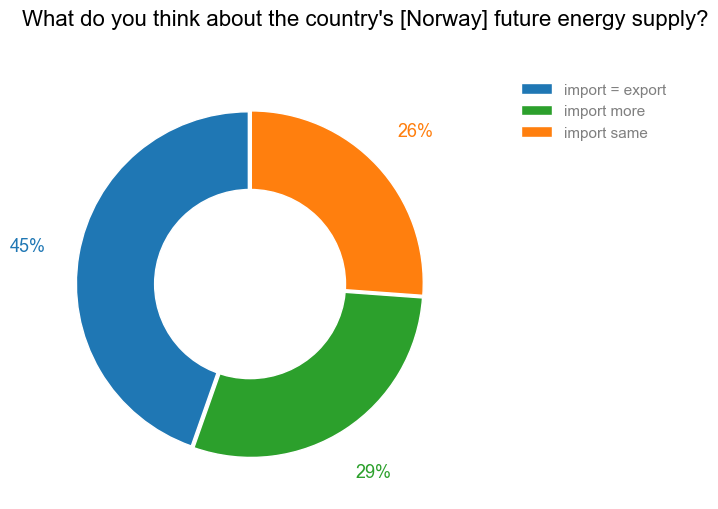

In [12]:
# TODO: Add code to visualize the question
fig, ax = plt.subplots(figsize = (8,6))
df = data["importOutlook"].groupby('sub')['sub'].count().sort_values(ascending = False)
rename_dict = {"balanced" : "import = export", "more" : "import more", "same" : "import same"}
df.rename(index = rename_dict, inplace = True)
donut_plot(df, fig, ax)
add_title(fig, "What do you think about the country's [Norway] future energy supply?")

#### Q10: Which option [Transmission line] do you prefer?
This questions gives three options to place transmission. Only one can be chosen forming a discrete set. 

In the dataset the values are stored as labels. Each label represents the option the student choosed. 

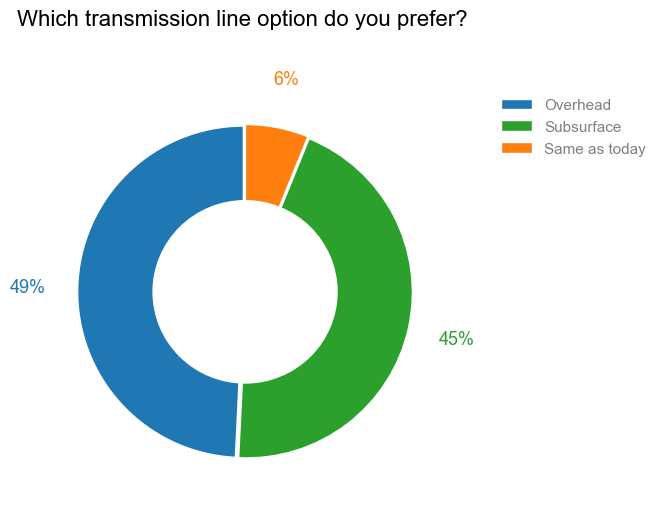

In [13]:
# TODO: Add code to visualize the question
fig, ax = plt.subplots(figsize = (8,6))
df = data["powerLine"].groupby('sub')['sub'].count().sort_values(ascending = False)
rename_dict = {"overground" : "Overhead", "underground" : "Subsurface", "nothing" : "Same as today"}
df.rename(index = rename_dict, inplace = True)
donut_plot(df, fig, ax)
add_title(fig, "Which transmission line option do you prefer?")

## School overview
Write about the different locations where we performed our Questionaire. To see if the students have some different biases based on their locations we are interested in looking at the differences between the schools

#### Q2: Which renewable energy source would you choose?
This question contains two discrimative choices in a series of five questions. Only at most three questions are shown to the student, depending on their choice of answer. The selection of questions shown to the student depends on: 
1. The first question selects between onshore and offshore wind-production. This dictates the prefered wind-placement for the student. 
2. If onshore is chosen the student has to select between small and large scale windturbines. This dictates the size of the windmills. 
3. The final question gives the student the option to include solar as well as windproduction.

All values are stored as binary. They form a discrete distribution showing the relation between offshore, onshore and a combination with solar. 

#### Q4: To what extent you agree or disagree to install wind turbines here?
This question lets the student rank a picture from a scale of 1 to 9. In total there are 9 different locations that are visualized. 

In the dataset the values are stored as discrete integers ranging from 1 to 9 for each question. 

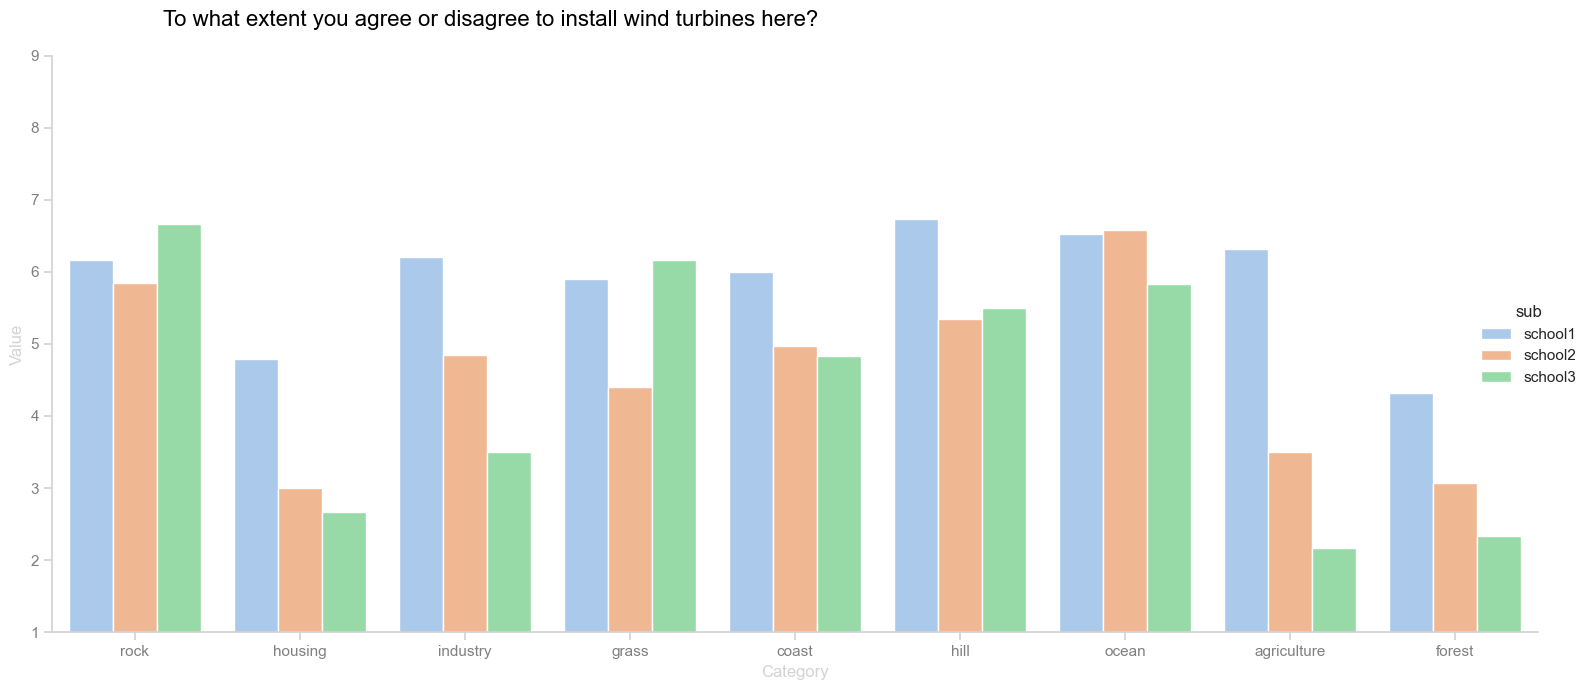

In [14]:
# TODO: Add code to visualize the question
# TODO: Find a fitting graph
import seaborn as sns
df = data[[ "date", "windVisual"]]

old_values = df[('date', 'sub')].unique()
new_values = ["school1", "school2", "school3"]

[df[('date', 'sub')].replace(old,new, inplace = True) for old, new in zip(old_values, new_values)]

df.columns = [col[1] for col in df.columns]

df = pd.melt(df, id_vars=['sub'], var_name='Category', value_name='Value')
df.groupby(["sub", "Category"])["Value"].mean().reset_index()
g = sns.catplot(x="Category", y="Value", hue="sub",
                data=df, 
                kind="bar", errorbar=None, palette = 'pastel', 
                aspect= 1.9, height = 8)
(g.set_titles("{col_name}")
  .set(ylim=(1, 9))
  #.despine(left=True)
  )  
add_title(g.figure, "To what extent you agree or disagree to install wind turbines here?")

#### Q3 & Q6: Which Norwegian county do you think are most appropriate for wind & solar energy?
This question lets the student choose the municipalities that they feel are appropriate for windmills and solar panels. They can choose multiple places and each municipality can either be choosen or left unchecked. 

In the dataset the values are stored as binary. They create a discrete distribution over each municipality. 

Text(-0.2, 0.5, 'Wind Power')

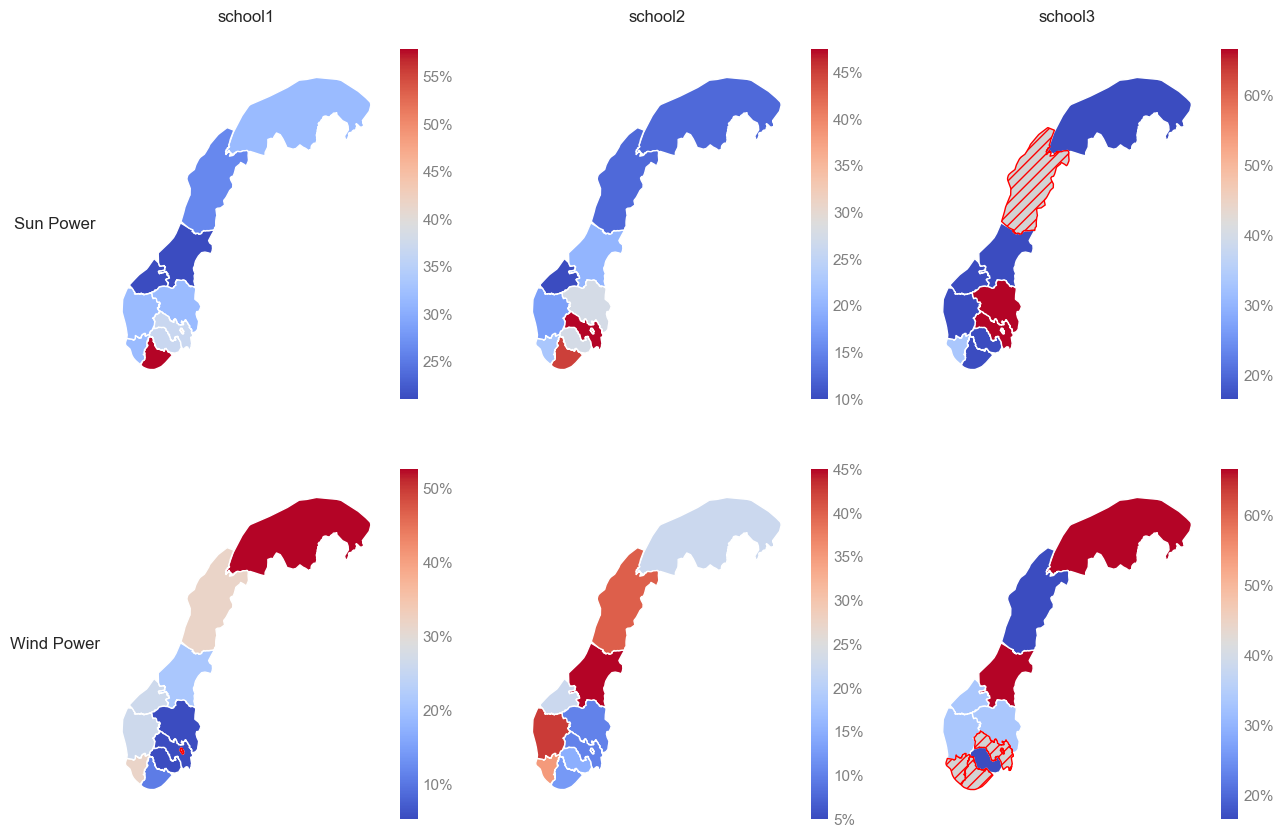

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Sun power data
com = get_geo(data["sunPower"])
df = data[["date", "sunPower"]]
old_values = df[('date', 'sub')].unique()
new_values = ["school1", "school2", "school3"]
[df[('date', 'sub')].replace(old, new, inplace=True) for old, new in zip(old_values, new_values)]
df.columns = [col[1] for col in df.columns]

schools = ["school1", "school2", "school3"]
for i, school in enumerate(schools):
    school_df = df[df["sub"] == school]
    com = get_geo(school_df.iloc[:, 1:])
    geo_plot(com, fig, ax[0][i])
    ax[0][i].set_title(school, pad = 30)

# Wind data
com = get_geo(data["windMun"])
df = data[["date", "windMun"]]
old_values = df[('date', 'sub')].unique()
new_values = ["school1", "school2", "school3"]
[df[('date', 'sub')].replace(old, new, inplace=True) for old, new in zip(old_values, new_values)]
df.columns = [col[1] for col in df.columns]

for i, school in enumerate(schools):
    school_df = df[df["sub"] == school]
    com = get_geo(school_df.iloc[:, 1:])
    geo_plot(com, fig, ax[1][i])
    #ax[1][i].set_title(school)

# Adding row titles
ax[0][0].text(-0.2, 0.5, 'Sun Power', va='center', ha='center', rotation='horizontal', transform=ax[0][0].transAxes)
ax[1][0].text(-0.2, 0.5, 'Wind Power', va='center', ha='center', rotation='horizontal', transform=ax[1][0].transAxes)

#### Q9: What do you think about the country's [Norway] future energy supply?
This question lets the student predict the countries future import of electricity. The question has three choices.

In the dataset the values are labelled showing the choice each student made.

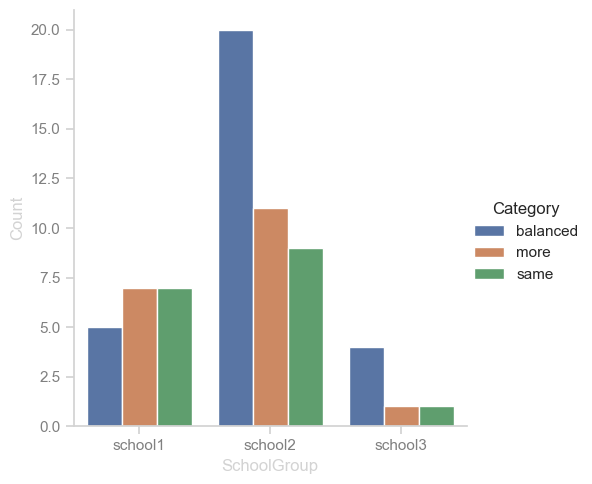

In [16]:
# TODO: Add code to visualize the question
# TODO: Add code to visualize the question
# TODO: Find a fitting graph
import seaborn as sns
df = data.drop(columns = [("opinions", "sub")])
column = "importOutlook"
df = df.groupby([("date","sub"), (column, "sub")]).sum().reset_index()

old_values = df[('date', 'sub')].unique()
new_values = ["school1", "school2", "school3"]

[df[('date', 'sub')].replace(old,new, inplace = True) for old, new in zip(old_values, new_values)]
df
df_sum = df[[(column,c) for c in df[column].columns[1:]]].sum(axis = 1)
df = df[[("date", "sub"), (column, "sub")]]
df.columns = [col[0] for col in df.columns]

df = pd.concat([df,df_sum], axis = 1)
df.columns = ["SchoolGroup", "Category", "Count"]
ax = sns.catplot(df, x = "SchoolGroup", y = "Count", hue = "Category", kind = "bar")

#### Q10: Which option [Transmission line] do you prefer?
This questions gives three options to place transmission. Only one can be chosen forming a discrete set. 

In the dataset the values are stored as labels. Each label represents the option the student choosed. 

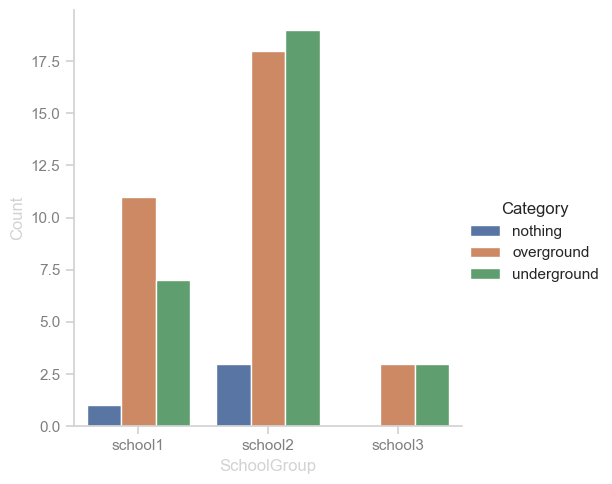

In [17]:
# TODO: Add code to visualize the question
# TODO: Add code to visualize the question
# TODO: Find a fitting graph
import seaborn as sns
df = data.drop(columns = [("opinions", "sub")])
column = "powerLine"
df = df.groupby([("date","sub"), (column, "sub")]).sum().reset_index()

old_values = df[('date', 'sub')].unique()
new_values = ["school1", "school2", "school3"]

[df[('date', 'sub')].replace(old,new, inplace = True) for old, new in zip(old_values, new_values)]
df
df_sum = df[[(column,c) for c in df[column].columns[1:]]].sum(axis = 1)
df = df[[("date", "sub"), (column, "sub")]]
df.columns = [col[0] for col in df.columns]

df = pd.concat([df,df_sum], axis = 1)
df.columns = ["SchoolGroup", "Category", "Count"]
ax = sns.catplot(df, x = "SchoolGroup", y = "Count", hue = "Category", kind = "bar")